# WeatherPy
----

### Analysis
* Temperatures tend to be warmer around the 0 degree latitude, as one would expect, though it is of note that cities in the northern hemisphere are experiencing even colder temperatures this time of the year than cities sampled from the southern hemisphere. 
* There is no strong relationship between latitude and wind speed or latitude and cloudiness, however, it was interesting to note that both graphs were very different in their distribution. Windiness this time of year near the equator seems to stay relatively low, but cloudiness shows a lot of variance from 0 to 100% across all cities.
* Humidity also shows a lot of variance across data points, however, there does seem to be a more concentrated cluster of cities around the equator (0 deg. Latitude) that are above 70% humidity. This is likely due to the warmer temperatures allowing for more water vapor in the air.

In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy as ow

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Set up lists to populate with data
city_names = []
cloudiness = []
country = []
date = []
hum = []
lat = []
lng = []
max_temp = []
wind_sp = []

# create settings dictionary to use in request urls
settings = {"units":"imperial", "appid":api_key}

# Print start of processing
print("Beginning Data Retrieval")
print("-----------------------------")

# set up counters
record_cnt = 1
grp = 1

# loop to iterate through each city, group into sets of 50, and capture counts
for i, city in enumerate(cities):

    if (i % 50 == 0 and i >= 50):
        grp += 1
        record_cnt = 1
    
    try:
#        use api wrapper to get responses for city and print status message
        response = ow.get_current(city,**settings)
        print(f"Processing record {record_cnt} of set {grp} | {city}")
        
#        add response values to appropriate lists 
        city_names.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        hum.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_sp.append(response['wind']['speed'])
        
        record_cnt += 1
        
#     skip if error found with current city 
    except:
        print("City not found. Skipping...")
    pass
    

# Print statement to indicate complete
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")


Beginning Data Retrieval
-----------------------------
Processing record 1 of set 1 | christchurch
Processing record 2 of set 1 | hermanus
Processing record 3 of set 1 | bonavista
Processing record 4 of set 1 | atuona
Processing record 5 of set 1 | chuy
Processing record 6 of set 1 | amahai
Processing record 7 of set 1 | hastings
Processing record 8 of set 1 | sampang
Processing record 9 of set 1 | martinez
Processing record 10 of set 1 | port blair
Processing record 11 of set 1 | castro
Processing record 12 of set 1 | barra do garcas
Processing record 13 of set 1 | bluff
Processing record 14 of set 1 | mataura
Processing record 15 of set 1 | busselton
Processing record 16 of set 1 | ayton
Processing record 17 of set 1 | stanghelle
Processing record 18 of set 1 | gafanha da encarnacao
Processing record 19 of set 1 | punta arenas
Processing record 20 of set 1 | hovd
Processing record 21 of set 1 | hobart
Processing record 22 of set 1 | la palma
Processing record 23 of set 1 | najran
Pro

Processing record 5 of set 5 | itarema
Processing record 6 of set 5 | rocha
Processing record 7 of set 5 | abalak
Processing record 8 of set 5 | igarka
City not found. Skipping...
Processing record 9 of set 5 | clyde river
Processing record 10 of set 5 | ketchikan
Processing record 11 of set 5 | pedernales
Processing record 12 of set 5 | kula
Processing record 13 of set 5 | yen bai
Processing record 14 of set 5 | kaitangata
Processing record 15 of set 5 | pasighat
Processing record 16 of set 5 | puli
Processing record 17 of set 5 | bambanglipuro
Processing record 18 of set 5 | tabou
Processing record 19 of set 5 | cliza
Processing record 20 of set 5 | geraldton
Processing record 21 of set 5 | ouesso
Processing record 22 of set 5 | verkhniy landekh
City not found. Skipping...
Processing record 23 of set 5 | cherskiy
City not found. Skipping...
Processing record 24 of set 5 | talaya
Processing record 25 of set 5 | la ronge
City not found. Skipping...
Processing record 26 of set 5 | mokhs

City not found. Skipping...
Processing record 13 of set 9 | bitung
Processing record 14 of set 9 | rodbyhavn
Processing record 15 of set 9 | tucurui
Processing record 16 of set 9 | chicama
Processing record 17 of set 9 | namatanai
Processing record 18 of set 9 | pushkino
City not found. Skipping...
Processing record 19 of set 9 | zarubino
Processing record 20 of set 9 | cap malheureux
Processing record 21 of set 9 | edson
Processing record 22 of set 9 | klaksvik
Processing record 23 of set 9 | coquimbo
Processing record 24 of set 9 | tigil
Processing record 25 of set 9 | fortuna
Processing record 26 of set 9 | santa vitoria do palmar
Processing record 27 of set 9 | grindavik
City not found. Skipping...
Processing record 28 of set 9 | rundu
Processing record 29 of set 9 | mackay
Processing record 30 of set 9 | yataity
Processing record 31 of set 9 | toyooka
Processing record 32 of set 9 | college
Processing record 33 of set 9 | atikokan
City not found. Skipping...
Processing record 34 o

Processing record 15 of set 13 | naze
Processing record 16 of set 13 | arkhangelsk
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# populate data frame with collected data
weather_data = pd.DataFrame({"City":city_names, "Cloudiness":cloudiness, "Country":country,
                             "Date":date, "Humidity":hum, "Lat":lat, "Lng":lng, 
                             "Max Temp":max_temp, "Wind Speed":wind_sp})

# check counts for each column
weather_data.count()

City          546
Cloudiness    546
Country       546
Date          546
Humidity      546
Lat           546
Lng           546
Max Temp      546
Wind Speed    546
dtype: int64

In [10]:
# save data frame to CSV
weather_data.to_csv(output_data_file, encoding="utf-8", index=False)

# display data frame
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Christchurch,0,NZ,1551244085,67,-43.53,172.64,71.01,27.51
1,Hermanus,92,ZA,1551243617,81,-34.42,19.24,57.46,2.86
2,Bonavista,92,CA,1551243644,77,48.65,-53.11,17.01,33.51
3,Atuona,32,PF,1551243951,100,-9.80,-139.03,81.22,7.49
4,Chuy,0,UY,1551243491,96,-33.69,-53.46,53.64,8.50


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

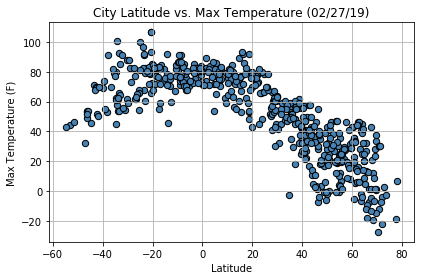

In [12]:
# create scatter plot for latitude and max temperature
plt.scatter(weather_data['Lat'], 
            weather_data['Max Temp'],
            marker = 'o',
            s = 40,
            c = 'steelblue',
            edgecolors = 'black'
           )

# set up labels and add grid
plt.title("City Latitude vs. Max Temperature (%s)" %time.strftime("%D"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.tight_layout()

# save to file
plt.savefig("output_data/Lat_vs_Temp.png")

# display plot
plt.show()

#### Latitude vs. Humidity Plot

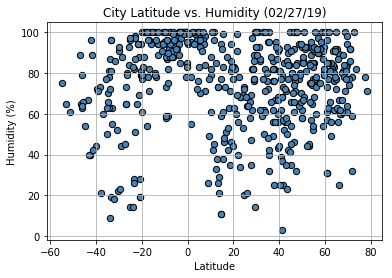

In [14]:
# create scatter plot for latitude and humidity
plt.scatter(weather_data['Lat'], 
            weather_data['Humidity'],
            marker = 'o',
            s = 40,
            c = 'steelblue',
            edgecolors = 'black',
           )

# set up labels and add grid
plt.title("City Latitude vs. Humidity (%s)" %time.strftime("%D"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# save to file
plt.savefig("output_data/Lat_vs_Humidity.png")

# display plot
plt.show()

#### Latitude vs. Cloudiness Plot

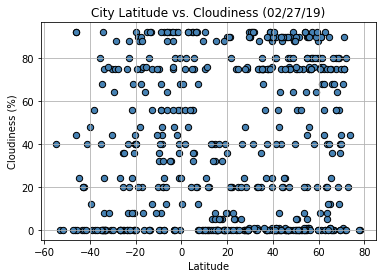

In [15]:
# create scatter plot for latitude and cloudiness
plt.scatter(weather_data['Lat'], 
            weather_data['Cloudiness'],
            marker = 'o',
            s = 40,
            c = 'steelblue',
            edgecolors = 'black',
           )

# set up labels and add grid
plt.title("City Latitude vs. Cloudiness (%s)" %time.strftime("%D"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()


# save to file
plt.savefig("output_data/Lat_vs_Clouds.png")

# display plot
plt.show()

#### Latitude vs. Wind Speed Plot

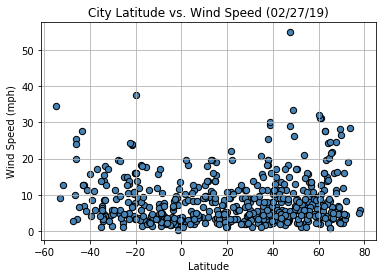

In [16]:
# create scatter plot for latitude and wind speed
plt.scatter(weather_data['Lat'], 
            weather_data['Wind Speed'],
            marker = 'o',
            s = 40,
            c = 'steelblue',
            edgecolors = 'black',
           )

# set up labels and add grid
plt.title("City Latitude vs. Wind Speed (%s)" %time.strftime("%D"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

# save to file
plt.savefig("output_data/Lat_vs_WindSpeed.png")

# display plot
plt.show()